In this notebook we extract HST psfs for COSMOS data using the psfs modeled in galsim

In [5]:
import galsim
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt

In [34]:
#Galsim catalog 
galsim_file = '/Users/remy/Desktop/LSST_Project/GalSim/examples/data/COSMOS_23.5_training_sample/real_galaxy_catalog_23.5.fits'
galsim_cat = pf.open(galsim_file)[1].data

#Coordinates
coords = np.array([[150.2311511, 2.0725000],
[150.23575, 2.0736144],
[150.2407120, 2.06514],
[150.2537000, 2.0480000],
[150.3054000, 2.0823254],
[150.3305180, 2.0707583],
[150.2693766, 2.0569287]])

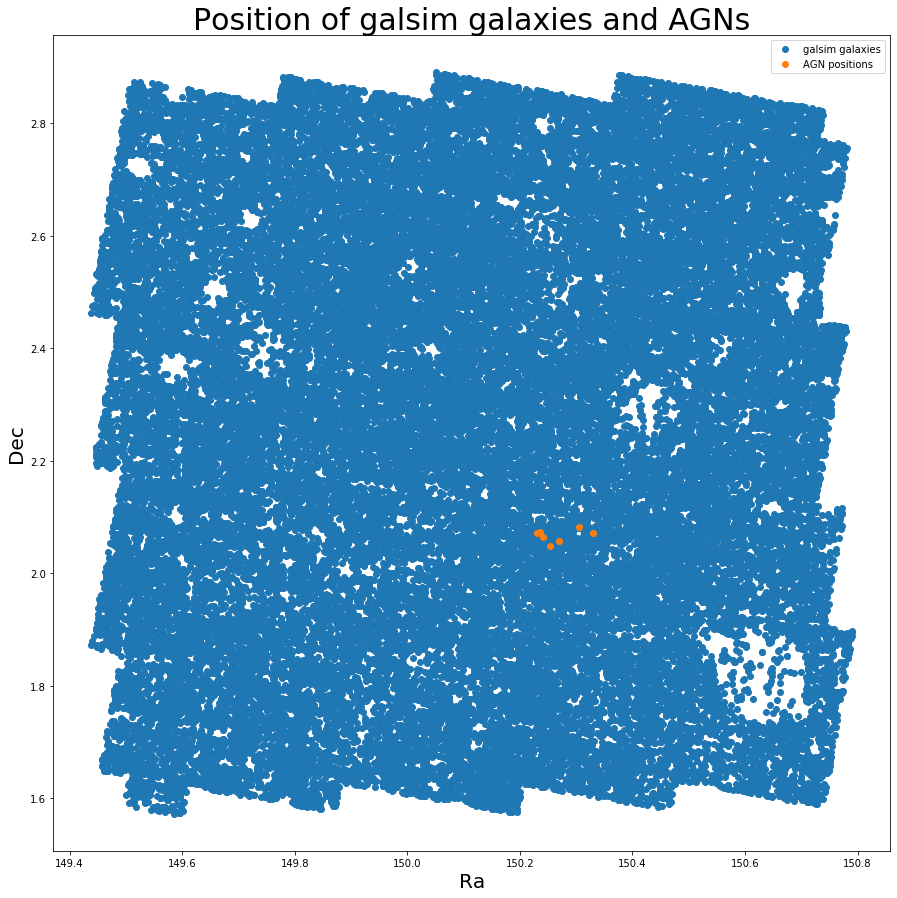

In [35]:
#Coordinates of all the galaxies in the galsim COSMOS sample
gal_ra, gal_dec = [], []
for g in galsim_cat:
    ra, dec = g[1], g[2]
    gal_ra.append(ra)
    gal_dec.append(dec)

#Positions of AGN and galsim sources
plt.figure(figsize = (15,15))
plt.title('Position of galsim galaxies and AGNs', fontsize = '30')
plt.plot(np.array(gal_ra), np.array(gal_dec), 'o', label = 'galsim galaxies')
plt.plot(np.array(coords[:,0]), np.array(coords[:,1]), 'o', label = 'AGN positions')
plt.xlabel('Ra', fontsize = 20)
plt.ylabel('Dec', fontsize = 20)
plt.legend()
plt.show()


(array([25]), array([25]))


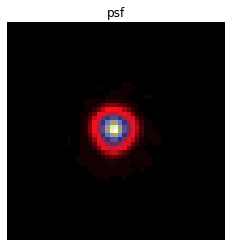

In [36]:
def galsim_psf_picker(index, catalog):
    """ A function that extract the psf of a galsim galaxy
    
    Paramters
    ---------
    index: int 
        index of the galsim galaxy for which we want to extract the psf
    catalog: list
        list of galsim object from a galsim catalog
    returns
    -------
    psf: array
        image of the psf for galsim image at index `index`
    """
    gal_cat = galsim.RealGalaxyCatalog(file_name=catalog)    
    psf = gal_cat.getPSF(index).drawImage(nx=51, ny=51, scale=0.03, method='real_space', offset = (-1,-1))
    return psf.array
# Example of how the psf picker works:
# Show the psf for the first galaxy in the galsim catalog:
psf0 = galsim_psf_picker(0, galsim_file)
print(np.where(psf0 == np.max(psf0)))
plt.title('psf')
plt.imshow(psf0, cmap = 'gist_stern')#Use np.log10(psf0) to reveal seemingly hidden features.
plt.axis('off') #Remove the indexation of the x and y axes
plt.show()

In [38]:
for c in coords:
    d = np.sqrt((c[0]-gal_ra)**2 + (c[1] - gal_dec)**2)
    loc = np.where(d == np.min(d))
    loc = loc[0][0]

    psf = galsim_psf_picker(loc, galsim_file)
    hdu = pf.PrimaryHDU(psf)
    hdul = pf.HDUList([hdu])
    hdul.writeto(f'data/psf_hst_ra={c[0]:.5f}_dec={c[1]:.5f}.fits', overwrite = True)